# Made By Rohit Nema

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("spam.csv",encoding=("ISO-8859-1"))

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1194,ham,Ok... C ya...,NaN,NaN,NaN
4301,ham,Aiyar hard 2 type. U later free then tell me t...,NaN,NaN,NaN
1050,ham,Are you available for soiree on June 3rd?,NaN,NaN,NaN
2073,spam,FreeMsg: Claim ur 250 SMS messages-Text OK to ...,NaN,NaN,NaN
4423,ham,Update your face book status frequently :),NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#Dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4080,ham,Hurry home. Soup is DONE!
5150,ham,Happy new year to u and ur family...may this n...
351,ham,If you're not in my car in an hour and a half ...
1550,ham,He says hi and to get your ass back to south t...
4079,ham,"Sir, good morning. Hope you had a good weekend..."


In [9]:
#renaming columns names
df.rename(columns={'v1':'result','v2':'text'},inplace=True)
df.sample(5)

,result,text
1693,ham,Was gr8 to see that message. So when r u leavi...
1274,ham,Let me know how to contact you. I've you settl...
1725,ham,You know there is. I shall speak to you in &l...
4744,spam,Camera - You are awarded a SiPix Digital Camer...
3114,ham,I wait 4 Ì_ inside da car park...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['result']=encoder.fit_transform(df['result'])

In [12]:
df

,result,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
#Missing values
df.isnull().sum()

result    0
text      0
dtype: int64

In [14]:
#duplicate values
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## EDA

In [18]:
df['result'].value_counts()

0    4516
1     653
Name: result, dtype: int64

In [19]:
import matplotlib.pyplot as plt

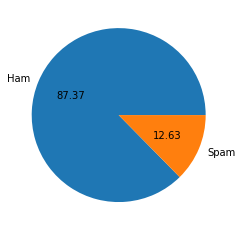

In [20]:
plt.pie(df['result'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#Number of character
#df['num_characters']=df['text'].apply(len)

In [24]:
df

,result,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [25]:
#num of words
#df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df

,result,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [27]:
#df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df

,result,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [29]:
df.describe()

,result
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [30]:
#Ham
df[df['result']==0].describe()

,result
count,4516.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [31]:
#Spam
df[df['result']==1].describe()

,result
count,653.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [32]:
#plt.figure(figsize=(20,6))
#sns.histplot(df[df['result']==0]['num_characters'])
#sns.histplot(df[df['result']==1]['num_characters'],color='red')
#plt.show()

In [33]:
#plt.figure(figsize=(20,6))
#sns.histplot(df[df['result']==0]['num_words'])
#sns.histplot(df[df['result']==1]['num_words'],color='red')
#plt.show()

In [34]:
#sns.heatmap(df.corr(),annot=True)
#plt.show()

## Data Processing

In [35]:
#import nltk
#nltk.download('stopwords')

In [36]:
#import string
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
#from nltk.tokenize import word_tokenize
#ps = PorterStemmer()

In [37]:
"""def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)#Converting sentences to single words
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i); #Removed special characters
            
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:#Removing Stopwords and Punctuations
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    
    """

'def transform_text(text):\n    text=text.lower()\n    text=nltk.word_tokenize(text)#Converting sentences to single words\n    \n    y=[]\n    for i in text:\n        if i.isalnum():\n            y.append(i); #Removed special characters\n            \n    text=y[:]\n    y.clear()\n    for i in text:\n        if i not in stopwords.words(\'english\') and i not in string.punctuation:#Removing Stopwords and Punctuations\n            y.append(i)\n    \n    text=y[:]\n    y.clear()\n    \n    for i in text:\n        y.append(ps.stem(i))\n    return " ".join(y)\n    \n    '

In [38]:
#transform_text("Hello This is dancing %% MSD ???")

In [39]:
"""from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")
"""

'from nltk.stem.porter import PorterStemmer\nps=PorterStemmer()\nps.stem("dancing")\n'

In [40]:
#df['transformed_text']=df['text'].apply(transform_text)

In [41]:
df

,result,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [42]:
#from wordcloud import WordCloud
#wc= WordCloud(width = 800, height = 800,min_font_size=10,background_color='white')

In [43]:
#spam_wc=wc.generate(df[df['result']==1]['transformed_text'].str.cat(sep=" "))

In [44]:
#plt.figure(figsize=(25,6))
#plt.imshow(spam_wc)

In [45]:
#ham_wc=wc.generate(df[df['result']==0]['transformed_text'].str.cat(sep=" "))
#plt.figure(figsize=(25,6))
#plt.imshow(ham_wc)

In [46]:
#spam_corpus=[]
#for msg in df[df['result']==1]['transformed_text'].tolist():
 #   for word in msg.split():
  #      spam_corpus.append(word)

In [47]:
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

In [48]:
#ham_corpus=[]
#for msg in df[df['result']==0]['transformed_text'].tolist():
 #   for word in msg.split():
  #      ham_corpus.append(word)

In [49]:
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
#X = tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
#X

In [53]:
X = tfidf.fit_transform(df['text']).toarray()

In [54]:
X.shape

(5169, 3000)

In [55]:
y=df['result'].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2, stratify=y)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
mnb = MultinomialNB()

In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[903   0]
 [ 22 109]]
1.0


In [61]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))